In [68]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import imagesc as imagesc

import warnings
warnings.filterwarnings("ignore")

In [69]:
# folder of the results
path_files2 = Path('/home/b1044271/Columbia/Results/FOOOF_interp/30-45')

# Get names of all subject folder
sbj_folders2 = list(path_files2.iterdir())
sbj_folders2 = sorted(sbj_folders2)

pathX2 = path_files2 / 'VP01'/'N1'/'Knee'
filesF2 = list(pathX2.iterdir())

In [70]:
filesF2

[PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T2_30-45_Knee_8p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T2_30-45_Knee_0p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T5_30-45_Knee_8p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T5_30-45_Knee_0p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T10_30-45_Knee_8p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T10_30-45_Knee_0p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T15_30-45_Knee_8p.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF_interp/30-45/VP01/N1/Knee/VP01_N1_T15_30-45_Knee_0p.json')]

In [93]:
# Get the fooof results for each subject
Stages    = ['N1','N2','N3','AW','RM']
nfm       = FOOOF()
nfm2      = FOOOF()
Sk_arr  = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Snk_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Pk_arr  = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Pnk_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Rk_arr  = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Rnk_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Fk_arr  = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))
Fnk_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF2)))

iii = 0
for stage in Stages:
    i = 0
    S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    R_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    NR_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    P_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    NP_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    F_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    NF_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders2)),columns=range(len(filesF2)))
    for subj in sbj_folders2:
        path1 = subj / stage / 'Knee'
        filesF = list(path1.iterdir())
        path2 = subj / stage / 'NoKnee'
        filesF2 = list(path2.iterdir())
        
        ii=0
        for F in filesF:
            nfm.load(os.path.basename(F) , str(path1))
            R_arr.iloc[[i],[ii]] = nfm.r_squared_
           # S_arr.iloc[[i],[ii]] = nfm.get_params('aperiodic_params','exponent')
           # P_arr.iloc[[i],[ii]] = nfm.n_peaks_
           # F_arr.iloc[[i],[ii]] = nfm.get_params('aperiodic_params','offset')

            ii = ii+1
            
        ii=0    
        for F2 in filesF2:
            nfm2.load(os.path.basename(F2) , str(path2))
            NR_arr.iloc[[i],[ii]] = nfm2.r_squared_
            #NS_arr.iloc[[i],[ii]] = nfm2.get_params('aperiodic_params','exponent')
            #NP_arr.iloc[[i],[ii]] = nfm2.n_peaks_
            #NF_arr.iloc[[i],[ii]] = nfm2.get_params('aperiodic_params','offset')

            ii = ii+1
        i = i+1
        
    Sk_arr.iloc[[iii],0:20] = list(S_arr.mean(axis=0))
    Snk_arr.iloc[[iii],0:20] = list(NS_arr.mean(axis=0))
        
    Pk_arr.iloc[[iii],0:20] = list(P_arr.mean(axis=0))
    Pnk_arr.iloc[[iii],0:20] = list(NP_arr.mean(axis=0))
        
    Rk_arr.iloc[[iii],0:20] = list(R_arr.mean(axis=0))
    Rnk_arr.iloc[[iii],0:20] = list(NR_arr.mean(axis=0))
        
    Fk_arr.iloc[[iii],0:20] = list(F_arr.mean(axis=0))
    Fnk_arr.iloc[[iii],0:20] = list(NF_arr.mean(axis=0))
    iii = iii +1                                        

In [94]:
R_arr.mean(axis=0)

0    0.990588
1    0.972832
2    0.975532
3    0.956847
4    0.954829
5    0.936406
6    0.929458
7    0.907596
dtype: float64

In [95]:
# The knee_arr / Nknee_arr dataframes contain th r2 averaged over all subjects per stage
# now we can mean over stages or use each stage separately (up to you) 
# here i'm gonna mean over all stages for an overall sensitivity matrix
K_R2_all = list(Rk_arr.mean(axis=0))
NK_R2_all = list(Rnk_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (4, 2))
NKnee_av_final = np.reshape(NK_R2_all, (4,2))

In [96]:
Rk_arr

,0,1,2,3,4,5,6,7
0,0.928893,0.813373,0.847829,0.699681,0.811959,0.677124,0.717996,0.639108
1,0.995896,0.989418,0.987164,0.973540,0.971292,0.962129,0.961392,0.945201
2,0.988444,0.962504,0.958572,0.922293,0.911231,0.865026,0.887000,0.854849
3,0.886229,0.711139,0.796595,0.655735,0.728412,0.588786,0.691905,0.575625
4,0.990588,0.972832,0.975532,0.956847,0.954829,0.936406,0.929458,0.907596


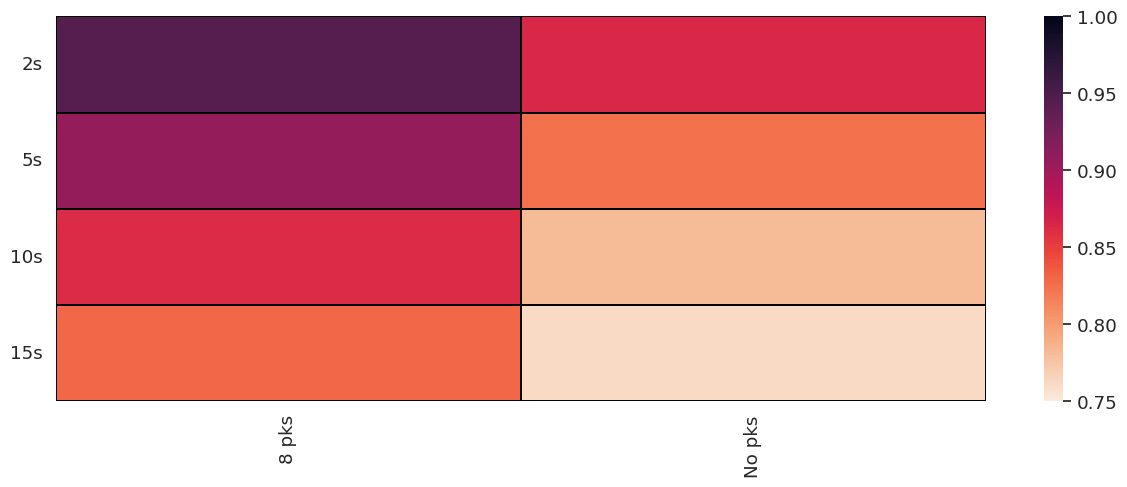

<Figure size 640x480 with 0 Axes>

In [99]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['8 pks','No pks'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.75, vmax=1.0)

plt.savefig("Group_Sens_matrix_No_knee_30-45.svg", dpi = 600 )



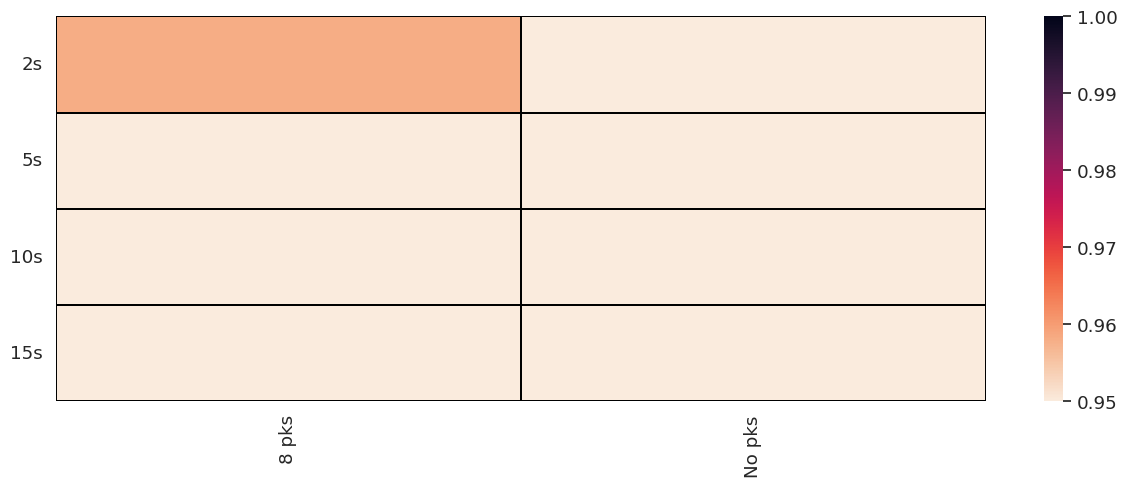

<Figure size 640x480 with 0 Axes>

In [98]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['8 pks','No pks'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0.95, vmax=1.0)

plt.savefig("Group_Sens_matrix_No_knee_30-45.svg", dpi = 600 )
